In [2]:
%matplotlib inline

In [17]:
import os
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [18]:
def array_from_text(text):
    text_points = text.replace(' ', '').replace('\n', '').replace(')', '').replace('(', '').split(';')
    pairs = []
    for text_point in text_points:
        pair = [float(x) for x in text_point.split(',')]
        pairs.append(pair)
    return np.array(pairs)

def euclidean(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def between_cluster_sum_of_squares(kmeans_result):
    total_error = 0
    total_mean = np.mean(kmeans_result.cluster_centers_, axis=0)
    for point in kmeans_result.cluster_centers_:
        total_error += euclidean(point, total_mean) ** 2
    return total_error

def find_elbow(series):
    # idea: find the point with the sharpest change

In [19]:
file_handles = [open('datasets/' + file) for file in os.listdir('datasets')]
#[fh.close() for fh in file_handles]

In [24]:
arr = array_from_text(file_handles[2].read())

In [21]:
arr

array([[ 0.,  0.],
       [ 4.,  4.],
       [ 3., -3.],
       [-2., -4.],
       [ 3.,  1.],
       [-1.,  1.],
       [-3., -4.],
       [-1., -1.]])

In [25]:
kmeans = KMeans(n_clusters=3)
result = kmeans.fit(arr)
result.labels_
result.inertia_
result.cluster_centers_
between_cluster_sum_of_squares(result)

37.518518518518519

In [26]:
result.inertia_

4.4999999999999929

In [29]:
kmeans_raw_objects = [KMeans(n_clusters=n) for n in range(2, len(arr))]
kmeans_results_objects = [kmeans.fit(arr) for kmeans in kmeans_raw_objects]
within_series = pd.Series({n: result.inertia_ for n, result in zip(range(2, len(arr)), kmeans_results_objects)})
between_series = pd.Series(
    {n: between_cluster_sum_of_squares(result) for n, result in zip(range(2, len(arr)), kmeans_results_objects)})

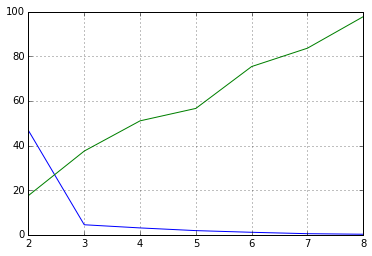

In [42]:
within_series.plot()
between_series.plot()
#(between_series - within_series).plot()

In [36]:
from itertools import islice
def n_grams(a, n):
    z = (islice(a, i, None) for i in range(n))
    return zip(*z)

In [43]:
jumps_it = map(lambda t: t[1] - t[0], n_grams(within_series, 2))
list(jumps_it)
# is there a point at which it

[-42.208333333333336,
 -1.4166666666666647,
 -1.2083333333333326,
 -0.74999999999999467,
 -0.62500000000000089,
 -0.25000000000000355]